# WPROWADZENIE DO SZTUCZNEJ INTELIGENCJI - LABORATORIUM 2

+ AUTOR: **ŁUKASZ STANISZEWSKI**
+ NR INDEKSU: **304098**
+ ADRES E-MAIL: **lukasz.staniszewski.stud@pw.edu.pl**
+ KIERUNEK: **INFORMATYKA**
+ PRZEDMIOT: **Wprowadzenie do sztucznej inteligencji**
+ ZADANIE: **[LINK](https://apps.usos.pw.edu.pl/apps/f/SxqpxTBL/lab2.pdf)**
+ TEMAT: **Implementacja metody realizującej algorytm ewolucyjny bez krzyżowania z selekcją turniejową i sukcesją elitarną i jej badanie**

## 1) Import niezbednych modułów
+ **numpy** -> operacje na macierzach i wektorach
+ **math** -> funkcje matematyczne
+ **mplot3d** + **pyplot** -> wykresy
+ **copy** -> konieczna jest kopia w selekcji turniejowej
+ **statistics** -> liczenie średniej
+ **pandas** -> tworzenie tabel
+ **time** -> mierzenie czasu

In [1]:
import numpy as np
import math
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import copy
import statistics
import pandas as pd
import time

## 2) Definicja niezbędnych funkcji, wektorów i macierzy
 

### 2.1. **Dla funkcji $f$<sub>$1$</sub>$(x)$**
+ $phi(x, \mu, \Sigma):$ <img src="https://i.upmath.me/svg/%5Cvarphi(x%2C%5Cmu%2C%5CSigma)%3D%7Be%5E%7B-0.5(x-%5Cmu)%5ET%5CSigma%5E%7B-1%7D(x-%5Cmu)%7D%5Cover%20%5Csqrt%7B(2%5Cpi)%5E%7Bdim(x)%7D%7C%5CSigma%7C%7D" alt="\varphi(x,\mu,\Sigma)={e^{-0.5(x-\mu)^T\Sigma^{-1}(x-\mu)}\over \sqrt{(2\pi)^{dim(x)}|\Sigma|}" />
+ $f1(x):$ <img src="https://i.upmath.me/svg/f_1(x)%20%3D%20%7B%5Cvarphi(x%2C%5Cmu_1%2C%5CSigma_1)%20%2B%20%5Cvarphi(x%2C%5Cmu_2%2C%5CSigma_2)%20%2B%20%5Cvarphi(x%2C%5Cmu_3%2C%5CSigma_3)%7D" alt="f_1(x) = {\varphi(x,\mu_1,\Sigma_1) + \varphi(x,\mu_2,\Sigma_2) + \varphi(x,\mu_3,\Sigma_3)}" />
+ $mi1, mi2, mi3:$ <img src="https://i.upmath.me/svg/%5Cmu_1%3D%5Cbegin%7Bbmatrix%7D%2014%5C%5C-11%5Cend%7Bbmatrix%7D%2C%20%5Cmu_2%3D%5Cbegin%7Bbmatrix%7D%2010%5C%5C-10%5Cend%7Bbmatrix%7D%2C%20%5Cmu_3%3D%5Cbegin%7Bbmatrix%7D%207%5C%5C-13%5Cend%7Bbmatrix%7D" alt="\varmu_1=\begin{bmatrix} 14\\-11\end{bmatrix}, \varmu_2=\begin{bmatrix} 10\\-10\end{bmatrix}, \varmu_3=\begin{bmatrix} 7\\-13\end{bmatrix}" />
+ $Sigma1, Sigma2, Sigma3:$ <img src="https://i.upmath.me/svg/%5CSigma_1%3D%5Cbegin%7Bbmatrix%7D%201.3%26%26-0.5%5C%5C-0.5%26%260.8%5Cend%7Bbmatrix%7D%2C%20%5CSigma_2%3D%5Cbegin%7Bbmatrix%7D%201.7%26%260.4%5C%5C0.4%26%261.2%5Cend%7Bbmatrix%7D%2C%20%5CSigma_3%3D%5Cbegin%7Bbmatrix%7D%201%26%260%5C%5C0%26%261.5%5Cend%7Bbmatrix%7D" alt="\Sigma_1=\begin{bmatrix} 1.3&amp;&amp;-0.5\\-0.5&amp;&amp;0.8\end{bmatrix}, \Sigma_2=\begin{bmatrix} 1.7&amp;&amp;0.4\\0.4&amp;&amp;1.2\end{bmatrix}, \Sigma_3=\begin{bmatrix} 1&amp;&amp;0\\0&amp;&amp;1.5\end{bmatrix}" />

In [2]:
mi1 = np.matrix([14, -11]).transpose()
mi2 = np.matrix([10, -10]).transpose()
mi3 = np.matrix([7, -13]).transpose()

Sigma1 = np.matrix([[1.3, -0.5],[-0.5, 0.8]])
Sigma2 = np.matrix([[1.7, 0.4],[0.4, 1.2]])
Sigma3 = np.matrix([[1, 0],[0, 1.5]])

def phi(x, mi, sigma):
    return math.exp(-0.5 * (x - mi).transpose() * np.linalg.inv(sigma) * (x-mi)) / (math.sqrt((2*math.pi)**2 * np.linalg.det(sigma)))

def f1(x):
    vector = np.matrix(x)
    if vector.shape[0] == 1:                                                       # allows to make a column vector as an imput
        vector = vector.transpose()
    return phi(vector, mi1, Sigma1) + phi(vector, mi2, Sigma2) + phi(vector, mi3, Sigma3)

def draw_function3D(function, functionName, minmax=25):
    fig = plt.figure(figsize=(14, 12))                                        # size of plot
    ax = Axes3D(fig)
    x = y = np.arange(-minmax, minmax, 0.05)                                  # range of x and y
    X, Y = np.meshgrid(x, y)
    zs = np.array([function([x,y]) for x,y in zip(np.ravel(X), np.ravel(Y))]) # creating function values for x and y
    Z = zs.reshape(X.shape)
    ax.plot_surface(X, Y, Z, linewidth=0)                                     # creating plot
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_zlabel('f(x1, x2)')
    ax.set_title(functionName)                                                # setting plot title
    plt.show()

def draw_function_contour(function, minx=-25, maxx=25, miny=-25, maxy=25):
    plt.style.use('seaborn-white')
    x = np.linspace(minx, maxx, 500)
    y = np.linspace(miny, maxy, 500)
    X,Y = np.meshgrid(x, y)
    zs = np.array([function([x,y]) for x,y in zip(np.ravel(X), np.ravel(Y))]) # creating function values for x and y
    Z = zs.reshape(X.shape)
    ax = plt.contour(X,Y,Z, 3, colors='black')
    plt.clabel(ax, inline=True, fontsize=8)
    plt.imshow(Z, extent=[minx, maxx, miny, maxy], origin='lower', alpha = 0.5)
    plt.rcParams["figure.figsize"] = (12,8)
    plt.colorbar()

+ Dodatkowo wykres funkcji $f_1$ w 3D:

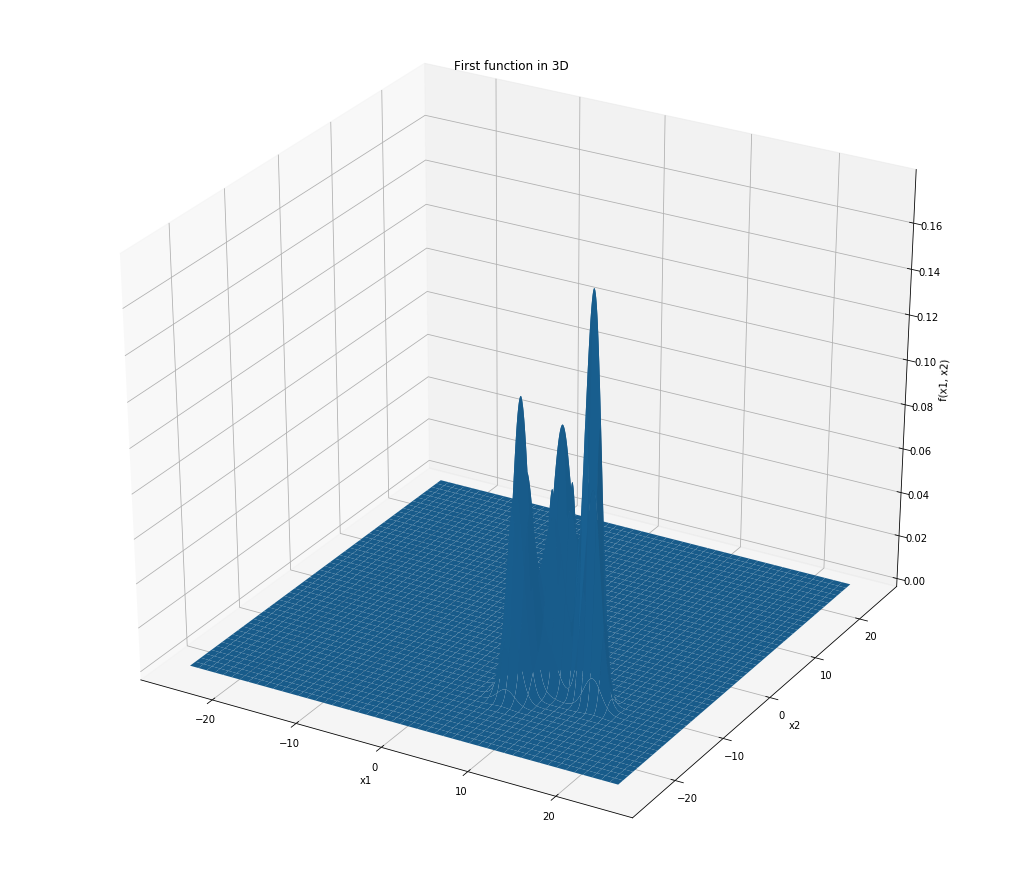

In [3]:
draw_function3D(f1, "First function in 3D")                                 # executing creating 3D function

+ Poziomicowy wykres funkcji $f_1$:

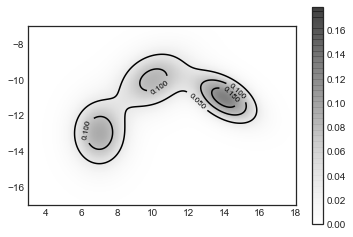

In [4]:
draw_function_contour(f1, 3, 18, -17, -7)

### 2.2. **Dla funkcji $f$<sub>$2$</sub>$(x)$**
+ f2(x): <img src="https://i.upmath.me/svg/f_2(x)%3D%7B-20e%5E%7B-0.2%20%5Csqrt%7B0.5x%5ETx%7D%7D-e%5E%7B0.5(cos(2%5Cpi%20x_1)%2B%20cos(2%5Cpi%20x_2))%7D%2Be%2B20%7D" alt="f_2(x)={-20e^{-0.2 \sqrt{0.5x^Tx}}-e^{0.5(cos(2\pi x_1)+ cos(2\pi x_2))}+e+20}" />

In [25]:
def f2(x):
    vector = np.matrix(x)
    if vector.shape[0] == 1:                                                       # allows to make a column vector as an imput
        vector = vector.transpose()
    x1 = vector.item(0)
    x2 = vector.item(1)
    return -20 * math.exp(-0.2*math.sqrt(0.5 * vector.transpose() * vector)) - math.exp(0.5 * (math.cos(2 * math.pi * x1) + math.cos(2 * math.pi * x2))) + math.e + 20

+ Dodatkowo wykres funkcji $ f_2 $ w 3D:

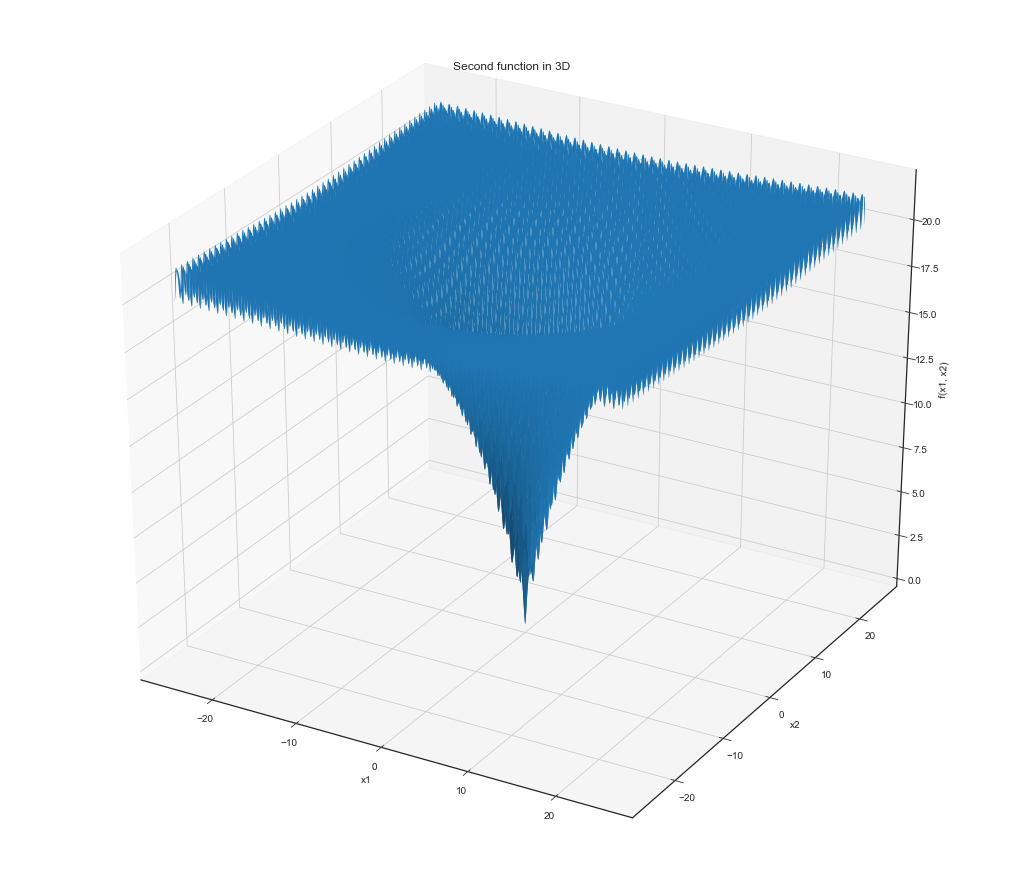

In [26]:
draw_function3D(f2, "Second function in 3D")

+ Poziomicowy wykres funkcji $f_2$:

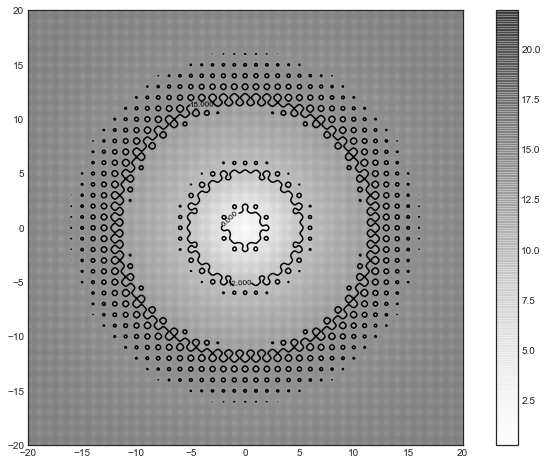

In [27]:
draw_function_contour(f2, -20, 20, -20, 20)

## 3) Definicja klas wspierających możliwość przeprowadzenia symulacji

### 3.1 Klasa Individual
+ reprezentuje pojedynczego osobnika populacji
+ posiada atrybuty takie jak składniki wektora będącego osobnikiem (**x1**, **x2**), funkcję (**function**) za pomocą której liczy ocenę (**rating**) - wartość funkcji w punkcie
+ jednym z atrybutów jest odchylenie standardowe mutacji (**mutation_deviation**)
+ metody mają za zadanie liczyć ocenę osobnika (**rate_individual()**) albo go mutować (**mutate()**)

In [8]:
class Individual:
    """
    Individual class represents a single individual.
    """
    def __init__(self, x1, x2, function_name, mutation_deviation):
        self.x1 = x1
        self.x2 = x2
        self.function = function_name
        self.mutation_deviation = mutation_deviation
        self.rating = None                                    # After performing iniciation there is no rating of individuals

    def rate_individual(self):
        """
        Rating specific individual.
        """
        self.rating = self.function([self.x1, self.x2])

    def mutate(self):
        """
        Mutates individual by adding to actual x1, x2 result of normal distribution with mean 0 and deviation = mutation_deviation.
        """
        new_x1 = self.x1 + np.random.normal(0, self.mutation_deviation)
        new_x2 = self.x2 + np.random.normal(0, self.mutation_deviation)
        self.x1 = new_x1
        self.x2 = new_x2

### 3.2 Klasa Population
+ reprezentuje populację (grupa wybrana z populacji za pomocą selekcji również jest formą populacji)
+ posiada atrybuty takie jak średnia i odchylenie standardowe rozkładu normalnego inicjującego punkty początkowe (**mean**, **deviation**), rozmiar populacji początkowej (**size_of_population**), nazwę funkcji, która będzie optymalizowana (**function**), odchylenie standardowe mutacji (**mutation_deviation**), rozmiar turnieju w selekcji turniejowej (**size_of_tournament**), listę osoboników populacji (**population**), informację czy będzie wykonywana maksymalizacja czy minimalizacja (**is_maximisation**)
+ metody mają za zadanie inicjować populację (**initiate()**), oceniać całą populację (**rate_populaton()**), sortować populację względem oceny osobników (**sort_population()**), liczyć średnią wartość funkcji dla populacji (**function_mean()**), liczyć najlepszą wartość funkcji dla populacji(**function_best()**), liczyć najgorszą wartość funkcji dla populacji(**function_worst()**), przeprowadzać mutację na osobnikach populacji (**mutate_population()**), przeprowadzać selekcję turniejową (**select_tournament()**), wykonywać sukcesję elitarną(**success_elite()**)

In [9]:
class Population:
    """
    Class Population represents a population.
    """
    def __init__(self, mean, deviation, size_of_population, function_name, mutation_deviation, size_of_tournament, is_maximalization):
        self.mean = mean
        self.deviation = deviation
        self.size_of_population = size_of_population
        self.function = function_name
        self.mutation_deviation = mutation_deviation
        self.size_of_tournament = size_of_tournament
        self.population = []
        self.is_maximalization = is_maximalization         # if is true, population in sort_population() is being sorted descending

    def initiate(self):
        for _ in range(self.size_of_population):           # creating n individuals and adding to list, where n = size_of_population
            x1 = np.random.normal(self.mean, self.deviation)
            x2 = np.random.normal(self.mean, self.deviation)
            self.population.append(Individual(x1, x2, self.function, self.mutation_deviation)) 

    def rate_population(self):
        for individual in self.population:                 # rates everyone
            individual.rate_individual()

    def sort_population(self):
        """
        Sorting individuals in population by their rating descending (if self.is_maximalization is True) or ascending (otherwise).
        """
        self.population.sort(reverse=self.is_maximalization, key=lambda pop: pop.rating)

    def function_mean(self):
        """
        Arithmetic avarage of individuals' ratings.
        """
        return statistics.mean([ind.rating for ind in self.population])

    def function_best(self):
        """
        Rating of best individual.
        """
        if len(self.population) > 0:
            return self.population[0].rating
        else:
            raise Exception("There is no individual in population")

    def function_worst(self):
        """
        Rating of worst individual.
        """
        if len(self.population) > 0:
            return self.population[len(self.population)-1].rating
        else:
            raise Exception("There is no individual in population")

    def mutate_population(self):
        """
        Mutates specific individuals.
        """
        for individual in self.population:
            individual.mutate()

    def select_tournament(self):
        """
        Performs tournament selection by creating empty population and adding to it winners of tournamets.
        Returns new Population object.
        """
        selected_individuals = Population(self.mean, self.deviation, self.size_of_population, self.function, self.mutation_deviation, self.size_of_tournament, self.is_maximalization)
        for _ in range(self.size_of_population):                           # while there wont be n of winners of tournaments (n=size_of_population)
            tournament_players = np.random.randint(0, self.size_of_population, self.size_of_tournament)  # creating single tournament
            selected_individuals.population.append(copy.deepcopy(self.population[min(tournament_players)]))  # because everything is sorted by rating function, we only need to take lowest number from indexes
        return selected_individuals      # returns new population

    def success_elite(self, selected_individuals, elite_success_param):
        """
        Performs elite success from given population and population selected.
        Parameter k of elite success <=> elite_success_param.
        """
        self.population = self.population[:len(self.population) - elite_success_param]    # n-k best of previous population (n = size_of_population)
        self.population.extend(selected_individuals.population[:elite_success_param])     # k best of selected population

## 4) Definicja funkcji przeprowadzającej symulacje algorytmu ewolucyjnego
### 4.1. Na początku pseudokod:

In [10]:
# Evolution_Algorithm(parameters):
# INITIATE(P0)
# RATE_AND_SORT(P0)
# WHILE(!STOP_CRITERIUM):
#      Tt = TOURNAMENT_SELECTION(Pt)
#      MUTATE(Tt)
#      RATE_AND_SORT(Tt)
#      Pt+1 = ELITE_SUCCESS(Pt, Tt)
#      SORT(Pt+1)

### 4.2. Algorytm w Python:
+ Parametry funkcji:
    + **is_maximalization** -> ustawione na _True_ maksymalizuje dana funkcje, na _False_ - minimalizuje  
    + **init_mean** -> definicja średniej dla rozkładu normalnego w przypadku inicjacji populacji 
    + **init_deviation** -> definicja odchylenia standardowego dla rozkładu normalnego w przypadku inicjacji populacji 
    + **s_of_population** -> rozmiar populacji
    + **func_name** -> nazwa funkcji, która będzie optymalizowana 
    + **mut_dev** -> odchylenie standarowe rozkładu normalnego dla mutacji
    + **s_of_tournament** -> rozmiar turnieju dla selekcji turniejowej
    + **elite_success_param** -> parametr k dla sukcesji turniejowej 
    + **budget** -> maksymalna liczba osobników dla których zostanie wykonana ocena
+ Funkcja zwraca populację ostateczną

In [11]:
def evolution_alg(is_maximalization, init_mean, init_deviation, s_of_population, func_name, mut_dev, s_of_tournament, elite_success_param, budget):
    population = Population(init_mean, init_deviation, s_of_population, func_name, mut_dev, s_of_tournament, is_maximalization)
    population.initiate()                                                    # INITAITE(P0)
    number_of_rates = 0
    population.rate_population()                                             # RATE(P0)
    population.sort_population()                                             # SORT(P0)
    number_of_rates += population.size_of_population                         # by rating full population, algorithm performs s_of_population rates
    while number_of_rates + population.size_of_population <= budget:         # STOP CRITERIUM
        selected_population = population.select_tournament()                 # Tt = TOURNAMENT_SELECTION(Pt)
        selected_population.mutate_population()                              # MUTATE (Tt)
        selected_population.rate_population()                                # RATE(Tt)
        selected_population.sort_population()                                # SORT(Tt)
        number_of_rates += len(selected_population.population)
        population.success_elite(selected_population, elite_success_param)   # Pt+1 = ELITE_SUCCESS(Pt, Tt)
        population.sort_population()                                         # SORT(Pt+1)
    return population

## 5) Znalezienie parametrów dla optymalizacji funkcji
### 5.1. Sformułowanie problemu
+ koniecznym jest znalezienie parametrów algorytmu w celu optymalizacji danej funkcji tak, aby średnia funkcji dla populacji była lepsza niż wartość progowa dla podanego budżetu i dla conajmniej 4 z 7 użytych ziaren dla generatora liczb pseudolosowych
+ założenie: ziarna = {1, 10, 100, 300, 500, 1000, 5000}

In [12]:
seeds = [1, 10, 100, 300, 500, 1000, 5000]

### 5.2. Funkcja $ f_1 $
+ narzucone parametry:
    + **rozkład normalny początkowy** = N(0,1) (init_mean = 0, init_deviation = 0)
    + **maksymalizacja** (is_maximilzation = True)
    + **funkcja** = f1 (func_name=f1)
    + **budżet** = $ 10^6 $ (budget = 1.000.000)
    + **próg** = 0.15 (treshold = 0.15)
    
+ założone parametry:
    + **rozmiar populacji** = 100 (s_of_population = 100)
    + **odchylenie standardowe mutacji** = 1 (mut_dev = 1)
    + **rozmiar turnieju** = 2 (s_of_tournament = 2)
    + **parametr sukcesji elitarnej** = 1 (elite_success_param = 1)

+ symulacje:

In [13]:
result_populations_f1 = []
for seed in seeds:
    np.random.seed(seed)
    result_populations_f1.append(evolution_alg(True, 0, 1, 100, f1, 1, 2, 1, 1000000))

+ Zestawienie tabelowe czy są lepsze od progu:

In [14]:
treshold_f1 = 0.15
f1_results = {}
f1_results["seeds"] = seeds
f1_results["mean"] = [round(population.function_mean(),4) for population in result_populations_f1]
f1_results["treshold"] = [treshold_f1 for _ in range(len(seeds))]
f1_results["is_better"] = [population.function_mean() > treshold_f1 for population in result_populations_f1]
df1 = pd.DataFrame(f1_results)
df1.set_index("seeds")

,mean,treshold,is_better
seeds,,,
1,0.1792,0.15,True
10,0.1792,0.15,True
100,0.1307,0.15,False
300,0.1792,0.15,True
500,0.1792,0.15,True
1000,0.1307,0.15,False
5000,0.1792,0.15,True


+ jak widać w 5 symulacjach na 7 udało się doprowadzić do populacji, dla której średnia wartość funkcji jest lepsza niż próg (większa niż 0.15)
+ uznane są więc te parametry za odpowiednie

### 5.3. Funkcja $ f_2 $
+ narzucone parametry:
    + **rozkład normalny początkowy** = N(3,1) (init_mean = 3, init_deviation = 1)
    + **minimalizacja** (is_maximilzation = False)
    + **funkcja** = f2 (func_name=f2)
    + **budżet** = $ 10^5 $ (budget = 100.000)
    + **próg** = 1 (treshold = 1)
    
+ założone parametry:
    + **rozmiar populacji** = 100 (s_of_population = 100)
    + **odchylenie standardowe mutacji** = 1 (mut_dev = 1)
    + **rozmiar turnieju** = 2 (s_of_tournament = 2)
    + **parametr sukcesji elitarnej** = 1 (elite_success_param = 1)
+ symulacje:

In [32]:
result_populations_f2 = []
for seed in seeds:
    np.random.seed(seed)
    result_populations_f2.append(evolution_alg(False, 3, 1, 100, f2, 1, 2, 1, 100000))

+ Zestawienie tabelowe czy są lepsze od progu:

In [33]:
treshold_f2 = 1
f2_results = {}
f2_results["seeds"] = seeds
f2_results["mean"] = [round(population.function_mean(),4) for population in result_populations_f2]
f2_results["treshold"] = [treshold_f2 for _ in range(len(seeds))]
f2_results["is_better"] = [population.function_mean() < treshold_f1 for population in result_populations_f2]
df2 = pd.DataFrame(f2_results)
df2.set_index("seeds")

,mean,treshold,is_better
seeds,,,
1,0.1136,1,True
10,0.1106,1,True
100,0.1127,1,True
300,0.1122,1,True
500,0.1352,1,True
1000,0.1360,1,True
5000,0.1155,1,True


+ W tym przypadku w każdej z 7 symulacji udało się doprowadzić do populacji, dla której średnia wartość funkcji jest lepsza niż próg (mniejsza niż 1)

## 6) Badanie zachowania algorytmu w przypadku zmiany wartości parametru rozmiaru turnieju

+ w przypadku tym zmodyfikowana zostanie funkcja opisana w punkcie 4 tak, aby zamiast zwracania ostatecznej populacji, zwracać listę średnich i najlepszych wartości funkcji celu w kolejnych iteracjach
+ funkcja symulująca:

In [34]:
def test_evolution_alg(is_maximalization, init_mean, init_deviation, s_of_population, func_name, mut_dev, s_of_tournament, elite_success_param, budget):
    steps_function_means = []
    steps_function_bests = []
    population = Population(init_mean, init_deviation, s_of_population, func_name, mut_dev, s_of_tournament, is_maximalization)
    population.initiate()                                                    # INITAITE(P0)
    number_of_rates = 0
    population.rate_population()                                             # RATE(P0)
    population.sort_population()                                             # SORT(P0)
    number_of_rates += population.size_of_population                         # by rating full population, algorithm performs s_of_population rates
    while number_of_rates + population.size_of_population <= budget:         # STOP CRITERIUM
        selected_population = population.select_tournament()                 # Tt = TOURNAMENT_SELECTION(Pt)
        selected_population.mutate_population()                              # MUTATE (Tt)
        selected_population.rate_population()                                # RATE(Tt)
        selected_population.sort_population()                                # SORT(Tt)
        number_of_rates += len(selected_population.population)
        population.success_elite(selected_population, elite_success_param)   # Pt+1 = ELITE_SUCCESS(Pt, Tt)
        population.sort_population()                                         # SORT(Pt+1)
        steps_function_means.append(population.function_mean())
        steps_function_bests.append(population.function_best())
    return steps_function_means, steps_function_bests

###  6.1. Zachowanie dla funkcji $f_1$
+ dodatkowo zostanie zbadany czas poszczególnych symulacji
+ porównane zostanie zachowanie algorytmu dla rozmiarów turnieju = {1, 2, 3, 5, 10, 15}
+ pozostałe parametry pozostały takie jak w punkcie 5., jednak budżet został zmniejszony do 100000 (aby przyśpieszyć obliczenia i nie tworzyć 10000 wierszy w tabeli wynikowej)
+ wybrany seed = 1000
+ symulacja:

In [18]:
simulations_means_f1 = []
simulations_bests_f1 = []
simulations_times_f1 = []
np.random.seed(1000)
tournament_sizes = [1, 2, 3, 5, 10, 15]
for tournament_size in tournament_sizes:
    start = time.time()
    temp_means, temp_bests = test_evolution_alg(True, 0, 1, 100, f1, 1, tournament_size, 1, 100000)
    stop = time.time()
    simulations_times_f1.append(round(stop-start, 3))
    simulations_means_f1.append(temp_means)
    simulations_bests_f1.append(temp_bests)

+ zestawienie wynikow w tabele:

In [19]:
results_tournament_f1 = {}
for tournament_size in range(len(tournament_sizes)):
    results_tournament_f1[f"mean for ts = {tournament_sizes[tournament_size]}"] = [round(x,4) for x in simulations_means_f1[tournament_size]]
    results_tournament_f1[f"best for ts = {tournament_sizes[tournament_size]}"] = [round(x,4) for x in simulations_bests_f1[tournament_size]]
df_ts_f1 = pd.DataFrame(results_tournament_f1)
df_ts_f1.index.name = 'step'
pd.set_option("display.max_rows", None, "display.max_columns", None, 'display.max_colwidth', None)
df_ts_f1

,mean for ts = 1,best for ts = 1,mean for ts = 2,best for ts = 2,mean for ts = 3,best for ts = 3,mean for ts = 5,best for ts = 5,mean for ts = 10,best for ts = 10,mean for ts = 15,best for ts = 15
step,,,,,,,,,,,,
0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0011
4,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0001,0.0123
5,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0002,0.0001,0.0061,0.0013,0.1149
6,0.0000,0.0000,0.0000,0.0000,0.0000,0.0006,0.0000,0.0023,0.0012,0.1183,0.0024,0.1149
7,0.0000,0.0000,0.0000,0.0000,0.0000,0.0043,0.0003,0.0311,0.0025,0.1264,0.0036,0.1153
8,0.0000,0.0000,0.0000,0.0000,0.0007,0.0631,0.0014,0.1043,0.0035,0.1264,0.0047,0.1156


+ wyniki pokazują, że algorytm działa najlepiej (znajduje najlepsze wartości) dla rozmiarów turnieju 3, 5 i 15 (dochodzi w nich do maksima globalnego w maksymalnie 1000 krokach)
+ nie występuje tu żadna proporcjonalność między liczbą rozmiarów turnieju a skutecznością algorytmu, wszystko zależy od konkretnej liczby
+ porównany zostanie jeszcze czas poszczególnych symulacji:

In [20]:
times_tournament_f1 = {}
times_tournament_f1["tournament size"] = tournament_sizes
times_tournament_f1["time [s]"] = simulations_times_f1
df_ts_f1 = pd.DataFrame(times_tournament_f1)
df_ts_f1.set_index("tournament size")

,time [s]
tournament size,
1,16.293
2,16.410
3,16.633
5,17.256
10,17.229
15,16.920


+ nie jest widoczne, aby rozmiar turnieju miał jakikolwiek wpływ na czas działania algorytmu

### 6.2. Zachowanie dla funkcji $f_2$
+ dodatkowo zostanie zbadany czas poszczególnych funkcji
+ porównane zostanie zachowanie algorytmu dla rozmiarów turnieju = {1, 2, 3, 5, 10, 15}
+ pozostałe parametry pozostały takie jak w punkcie 5.
+ wybrany seed = 1000
+ symulacja:

In [35]:
simulations_means_f2 = []
simulations_bests_f2 = []
simulations_times_f2 = []
np.random.seed(1000)
tournament_sizes = [1, 2, 3, 5, 10, 15]
for tournament_size in tournament_sizes:
    start = time.time()
    temp_means, temp_bests = test_evolution_alg(False, 3, 1, 100, f2, 1, tournament_size, 1, 100000)
    stop = time.time()
    simulations_times_f2.append(round(stop-start, 3))
    simulations_means_f2.append(temp_means)
    simulations_bests_f2.append(temp_bests)

+ zestawienie wynikow w tabele:

In [36]:
results_tournament_f2 = {}
for tournament_size in range(len(tournament_sizes)):
    results_tournament_f2[f"mean for ts = {tournament_sizes[tournament_size]}"] = [round(x,4) for x in simulations_means_f2[tournament_size]]
    results_tournament_f2[f"best for ts = {tournament_sizes[tournament_size]}"] = [round(x,4) for x in simulations_bests_f2[tournament_size]]
df_ts_f2 = pd.DataFrame(results_tournament_f2)
df_ts_f2.index.name = 'step'
pd.set_option("display.max_rows", None, "display.max_columns", None, 'display.max_colwidth', None)
df_ts_f2

,mean for ts = 1,best for ts = 1,mean for ts = 2,best for ts = 2,mean for ts = 3,best for ts = 3,mean for ts = 5,best for ts = 5,mean for ts = 10,best for ts = 10,mean for ts = 15,best for ts = 15
step,,,,,,,,,,,,
0,10.4532,5.4598,10.5392,3.1227,10.6757,3.5386,10.3170,2.1079,10.6542,2.2431,10.4948,1.5697
1,10.3645,5.2554,10.4328,3.0144,10.5918,3.5386,10.2049,2.0646,10.5484,2.2431,10.3799,1.5697
2,10.2684,3.7514,10.3280,3.0144,10.4756,2.0243,10.1026,2.0646,10.4381,2.2186,10.2627,1.5697
3,10.1708,3.4713,10.2217,2.8302,10.3787,2.0243,10.0029,2.0646,10.3224,1.5921,10.1359,1.2444
4,10.0575,1.8679,10.1159,2.4100,10.2753,2.0243,9.8882,1.7146,10.2143,1.5921,10.0064,0.4219
5,9.9561,1.8679,10.0160,2.4100,10.1650,1.9169,9.7632,0.5553,10.1064,1.5921,9.8890,0.4219
6,9.8577,1.8679,9.9196,2.4100,10.0683,1.9169,9.6520,0.5553,9.9791,0.2213,9.7595,0.0975
7,9.7635,1.8679,9.7954,0.3479,9.9425,0.2578,9.5449,0.5553,9.8584,0.2213,9.6305,0.0975
8,9.6614,1.8679,9.6942,0.3479,9.8158,0.1148,9.4477,0.5553,9.7491,0.2213,9.5041,0.0975


+ jak widać, w tym przypadku również zmiana wielkości rozmiaru turnieju spowodowała że wyniki końcowe różnią się od siebie, prawdopodobnie symulacje doprowadzają populacje do różnych minimów loklanych
+ w tym przypadku algorytm zachowuje się najlepiej dla rozmiarów turniejów = {5, 15}
+ porównany zostanie jeszcze czas poszczególnych symulacji:

In [37]:
times_tournament_f2 = {}
times_tournament_f2["tournament size"] = tournament_sizes
times_tournament_f2["time [s]"] = simulations_times_f2
df_ts_f2 = pd.DataFrame(times_tournament_f2)
df_ts_f2.set_index("tournament size")

,time [s]
tournament size,
1,5.143
2,5.281
3,5.320
5,5.549
10,5.515
15,5.293


+ widać również, że zmiana rozmiaru turnieju nie wpływa na czas działania algorytmu